In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#importing application data file and seeing top 5 dataset values
df1=pd.read_csv("application_data.csv")
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#find the shape of the data i.e. number of rows and number of columns
df1.shape

(307511, 122)

In [4]:
#to find the information about the data
df1.info(max_cols=122,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
#to find the percentage of null values in descending order
print(round((100*df1.isnull().mean()).sort_values(ascending = False),2).to_string())

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [6]:
#deleting the null values above 40%
df_app=df1.dropna(thresh=len(df1)*0.6,axis='columns')

In [7]:
#finding the shape of the data after dropping the null values
df_app.shape

(307511, 73)

In [8]:
#to find the percentage of null values in descending order
print(round((100*df_app.isnull().mean()).sort_values(ascending = False),2).to_string())

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_21                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
F

In [9]:
#imputing the numerical value with median
df_app=df_app.fillna(df_app.median())

In [10]:
#imputing the categorical value with mode
mod=df_app["OCCUPATION_TYPE"].mode()[0]
df_app["OCCUPATION_TYPE"]=df_app["OCCUPATION_TYPE"].fillna(mod)
mod=df_app["NAME_TYPE_SUITE"].mode()[0]
df_app["NAME_TYPE_SUITE"]=df_app["NAME_TYPE_SUITE"].fillna(mod)

In [11]:
#to find the percentage of null values in descending order
print(round((100*df_app.isnull().mean()).sort_values(ascending = False),2).to_string())

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

In [12]:
#Segmenting categorical columns for analysis
cat_col = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT',
           'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
#converting object datatype to category datatype
for col in cat_col:
    df_app[col] =pd.Categorical(df_app[col])

In [13]:
#checking statistics for birth and employed column
l = ['DAYS_BIRTH','DAYS_EMPLOYED']
df_app[l].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.000000,307511.000000
mean,-16036.995067,63815.045904
std,4363.988632,141275.766519
min,-25229.000000,-17912.000000
25%,-19682.000000,-2760.000000
50%,-15750.000000,-1213.000000
75%,-12413.000000,-289.000000
max,-7489.000000,365243.000000


### We can see negative values or data discrepency in these two columns

In [14]:
#Converting negative values to positive values
df_app[l]=abs(df_app[l])

In [15]:
#Converting days of birth in years and creating a column age-group
df_app["AGE"] = df_app["DAYS_BIRTH"]/365
bins = [0,20,30,40,50,100]
slots = ["18-20","20-30","30-40","40-50","50 Above"]
df_app["AGE_GROUP"] = pd.cut(df_app["AGE"], bins=bins, labels=slots)

## Outliers

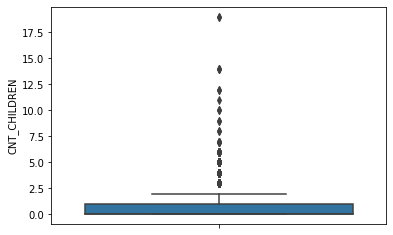

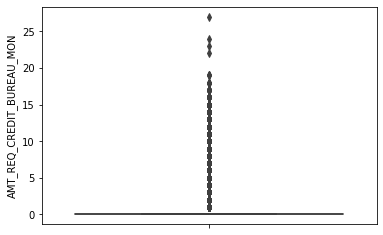

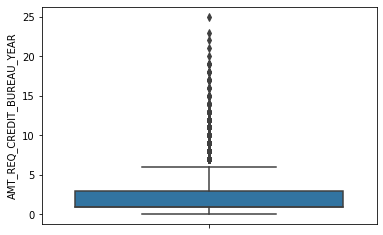

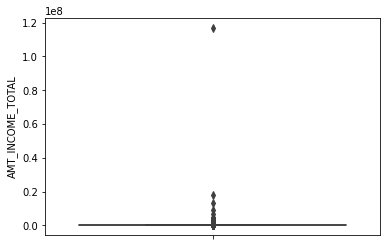

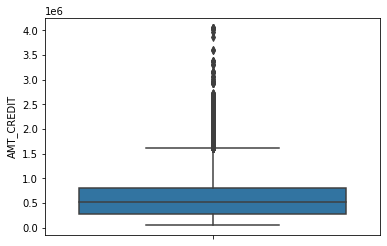

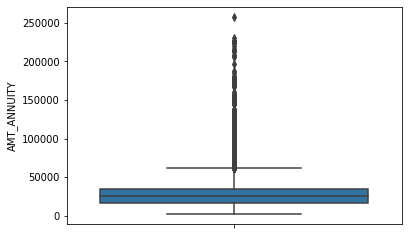

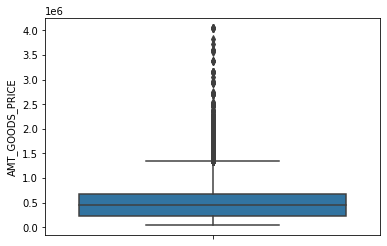

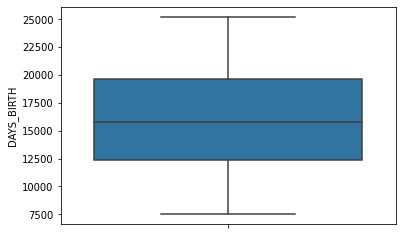

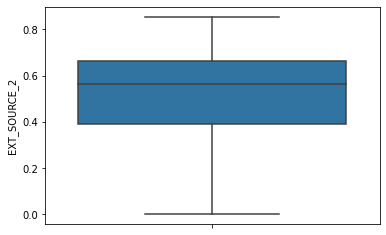

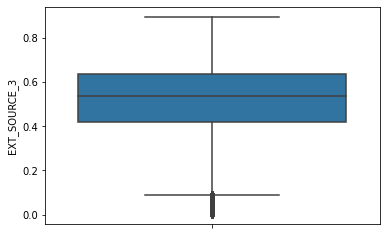

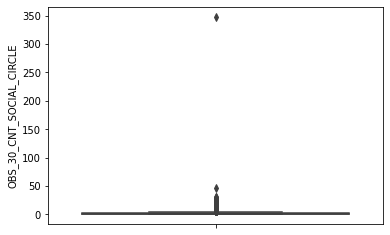

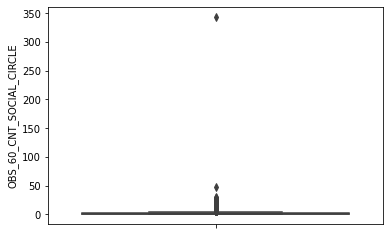

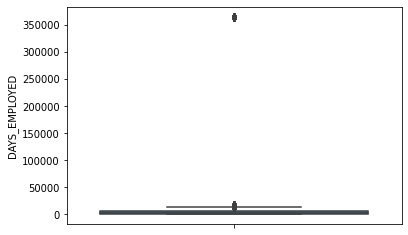

In [16]:
#Segmenting continuous variable
cont_col=['CNT_CHILDREN','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH','EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 
       'OBS_60_CNT_SOCIAL_CIRCLE',"DAYS_EMPLOYED"]
#Bar plot for checking outliers
for i in cont_col:
    sns.boxplot(y=df_app[i])
    plt.show() 

## Data Imbalance

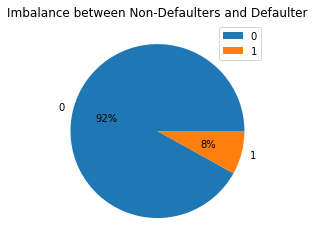

In [17]:
#Pie chart for loan defaulters
y=df_app["TARGET"].value_counts(normalize=True).values
lab=[0,1]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.title('Imbalance between Non-Defaulters and Defaulter')
plt.show()

## Univariate Analysis

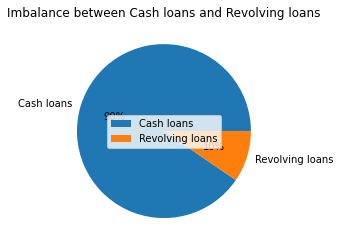

In [18]:
#Pie chart for loan type
y=df_app["NAME_CONTRACT_TYPE"].value_counts(normalize=True).values
lab=['Cash loans', 'Revolving loans']
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.title('Imbalance between Cash loans and Revolving loans')
plt.show()

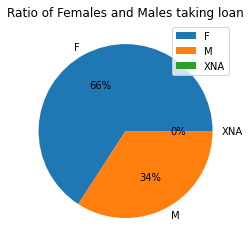

In [19]:
#Pie chart for sex ratio
y=df_app["CODE_GENDER"].value_counts(normalize=True).values
lab=['F','M','XNA']
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.title("Ratio of Females and Males taking loan")
plt.legend()
plt.show()

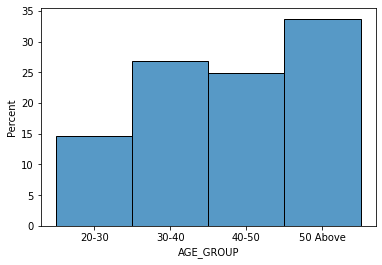

In [20]:
#Histogram to see the distribution of age group taking loan
sns.histplot(df_app['AGE_GROUP'],stat='percent')
plt.show()

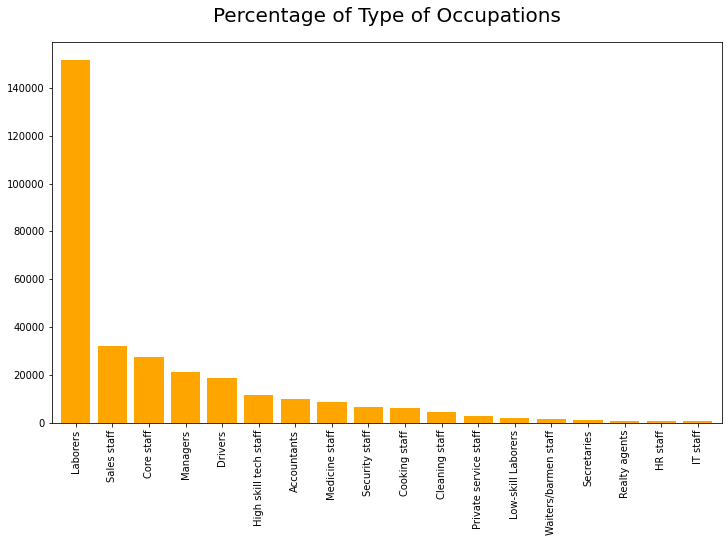

In [21]:
#Barplot for Type of occupations taking loan
plt.figure(figsize = [12,7])
(df_app["OCCUPATION_TYPE"].value_counts()).plot.bar(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

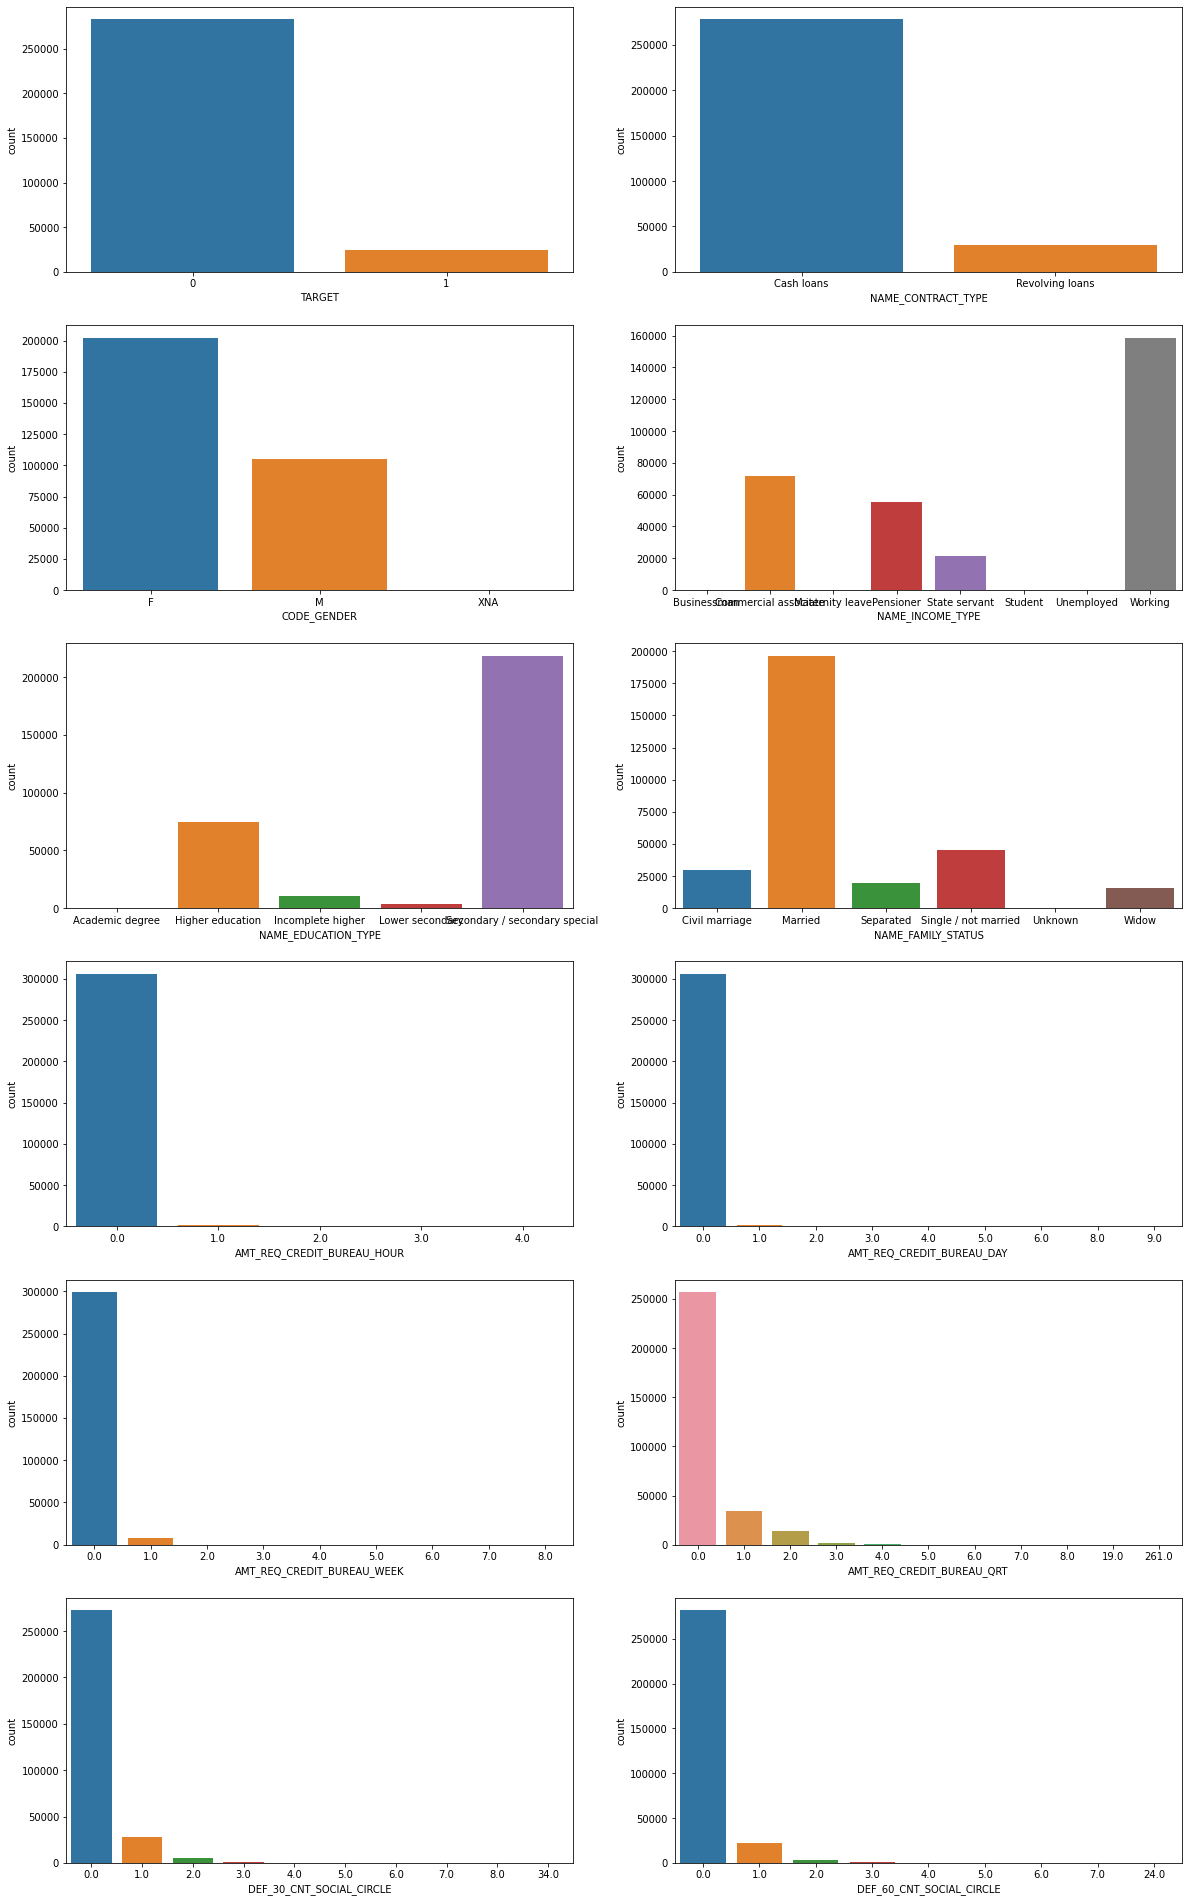

In [22]:
plt.figure(figsize = (20,40))
i = 1
for col in cat_col:
    plt.subplot(7,2,i)
    sns.countplot(x = col , data = df_app)
    i += 1
plt.show()

## Bivariate Analysis

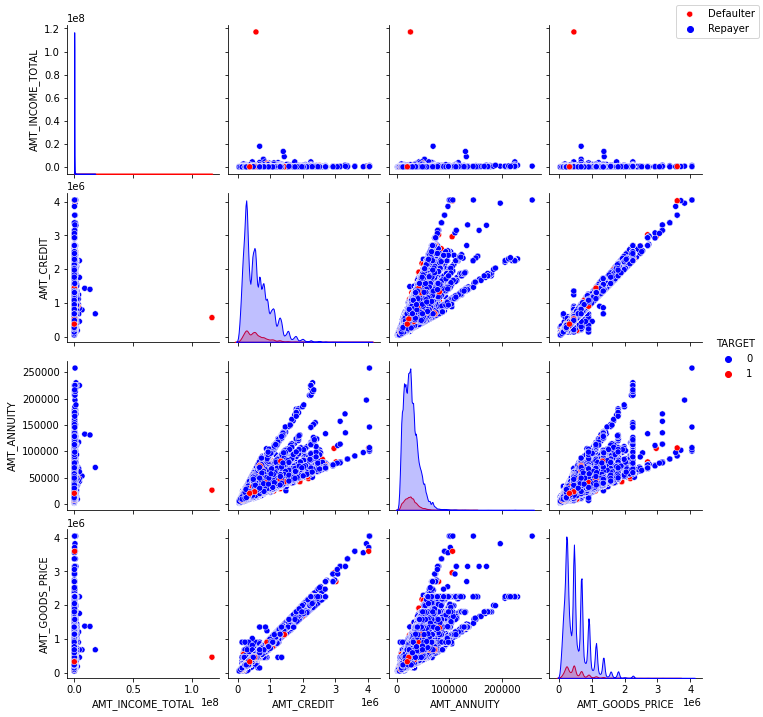

In [23]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = df_app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

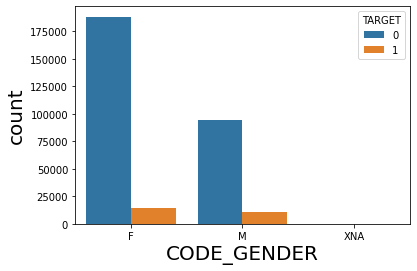

In [56]:
#countplot to see gender according to target variable
sns.countplot(x=df_app["CODE_GENDER"],hue=df_app['TARGET'])
plt.show()

## Multivariate Analysis

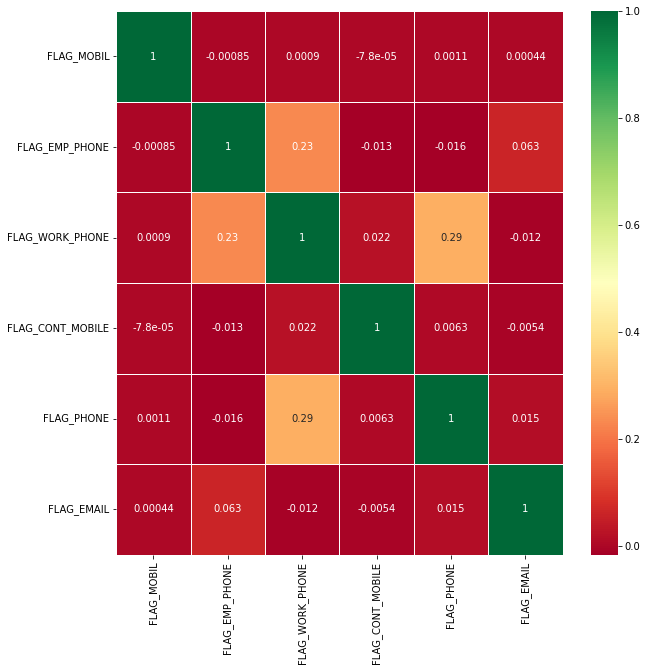

In [25]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members,Region rating with target
contact_col = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
Contact_corr = df_app[contact_col].corr()
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(Contact_corr,xticklabels=Contact_corr.columns,yticklabels=Contact_corr.columns,annot = True,cmap ="RdYlGn",
                 linewidth=1)

### We can see from above graph that contact columns have no correlation with target variable.

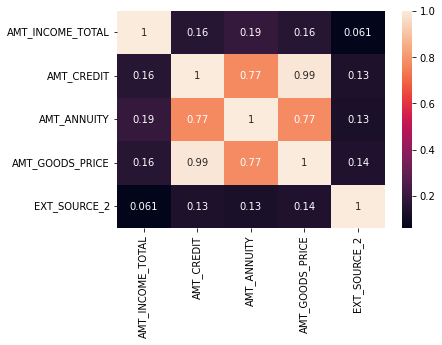

In [26]:
#heat map for showing positive correlation
contact_col = [ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','TARGET']
sns.heatmap(df_app[contact_col].corr(),annot=True)
plt.show()

# we divide out data set into two parts target 1 and target 0

In [27]:
# creating new datadrame for target=0
target0 =df_app[df_app['TARGET']==0]
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,50 Above
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,50 Above
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,50 Above
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,40-50


In [28]:
# creating new datadrame for target=1
target1 = df_app[df_app['TARGET']==1]
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,50 Above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,50 Above


In [29]:
# now we need to find top 10 correlations
corr0 = target0.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
2977,AGE,DAYS_BIRTH,1.000000,1.000000
668,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1679,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
278,AMT_GOODS_PRICE,AMT_CREDIT,0.987022,0.987022
1063,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
936,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
1287,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
1455,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
279,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,0.776421
223,AMT_ANNUITY,AMT_CREDIT,0.771297,0.771297


In [30]:
# now we need to find top 10 correlations
corr1 =target1.corr()
corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df1['Corr_abs'] = abs(corr_df1['Correlation_Value'])
corr_df1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df1.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
2977,AGE,DAYS_BIRTH,1.000000,1.000000
668,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1679,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,0.998270
278,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
1063,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
936,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
1287,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1455,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
279,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
223,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195


In [31]:
#importing previous application file and seeing top 5 dataset values
df=pd.read_csv("previous_application.csv")
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#find the shape of the data i.e. number of rows and number of columns
df.shape

(1670214, 37)

In [33]:
#to find the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [34]:
#to find the percentage of null values in descending order
print(round((100*df.isnull().mean()).sort_values(ascending = False),2))

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [35]:
#deleting the null values above 40%
df_prev=df.dropna(thresh=len(df)*0.6,axis='columns')

In [36]:
#finding the shape of the data after dropping the null values
df_prev.shape

(1670214, 26)

In [37]:
#imputing the numerical value with median
df_prev=df_prev.fillna(df.median())

In [38]:
#imputing the categorical value with mode
mod=df_prev["PRODUCT_COMBINATION"].mode()[0]
df_prev["PRODUCT_COMBINATION"]=df_prev["PRODUCT_COMBINATION"].fillna(mod)

In [39]:
#to find the percentage of null values in descending order
print(round((100*df_prev.isnull().mean()).sort_values(ascending = False),2))

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64


### We can see that now there are no missing values in the data after imputation

## Outliers

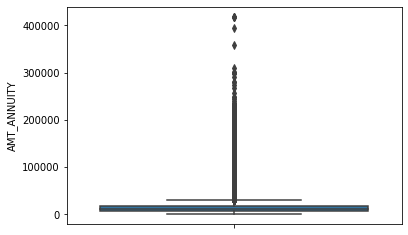

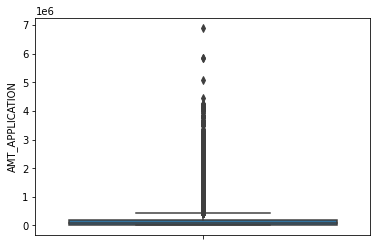

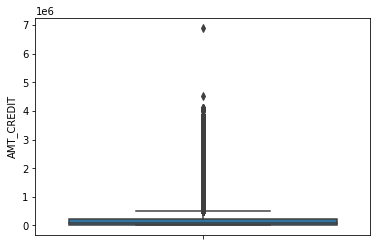

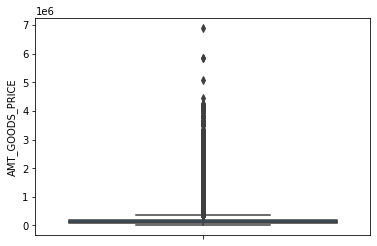

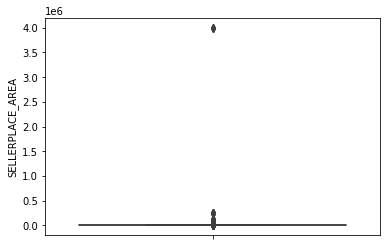

In [40]:
#finding outliers using box plot in segmented continuous columns
cont_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
for i in cont_col:
    sns.boxplot(y=df_prev[i])
    plt.show() 

### There are outliers present in AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA .

## Data Imbalance

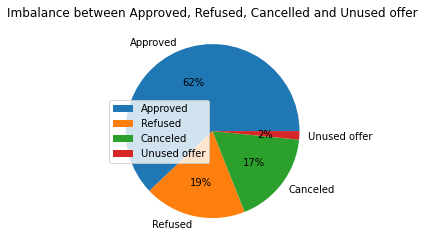

In [41]:
#finding data imbalance by plotting pie chart
y=df_prev["NAME_CONTRACT_STATUS"].value_counts(normalize=True).values
lab=['Approved', 'Refused', 'Canceled', 'Unused offer']
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.title('Imbalance between Approved, Refused, Cancelled and Unused offer')
plt.show()

### We can see that there are 62% of applicants loan got approved with 19% loan got refused(company rejected the loan) and 17% cancelled(by client) and 2% unsed offer(cancelled by the client).

In [42]:
#to check statistics for DAYS_DECISION column
df_prev["DAYS_DECISION"].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

### We can see negative values or data discrepancy in the DAYS_DECISION column.

In [43]:
#converting days_decision vlues to positive values
df_prev["DAYS_DECISION"]=abs(df_prev["DAYS_DECISION"])

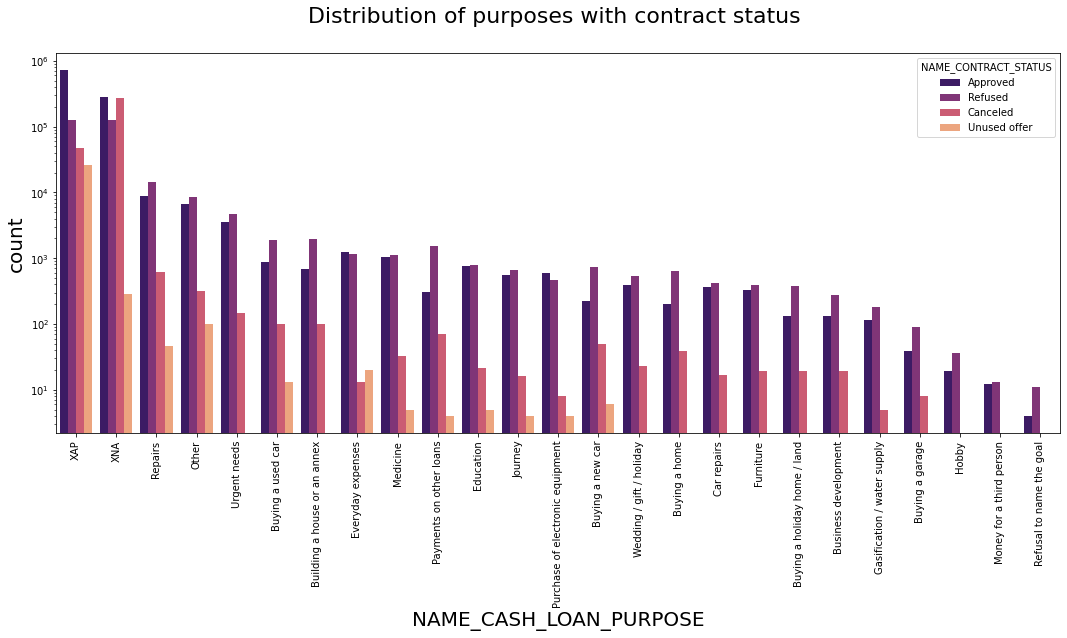

In [44]:
plt.figure(figsize=(18,7))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with contract status ')
sns.countplot(data = df_prev,x=df_prev['NAME_CASH_LOAN_PURPOSE'], order=df_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).index,
              hue = 'NAME_CONTRACT_STATUS',palette='magma') 
plt.show()

## Merged Dataframe

In [45]:
df=pd.merge(df_app,df_prev,on="SK_ID_CURR",how="inner")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [46]:
df.shape

(1413701, 100)

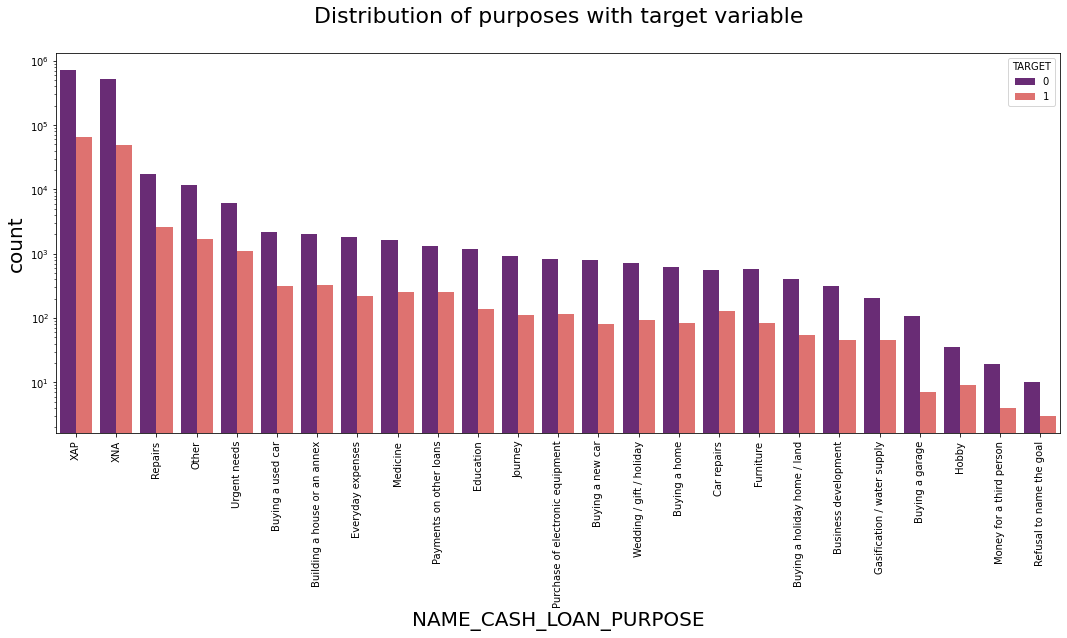

In [47]:
plt.figure(figsize=(18,7))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target variable')
sns.countplot(data = df,x=df['NAME_CASH_LOAN_PURPOSE'], order=df['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).index,
              hue = 'TARGET',palette='magma') 
plt.show()

### Loan purpose has high number of unknown values (XAP, XNA)

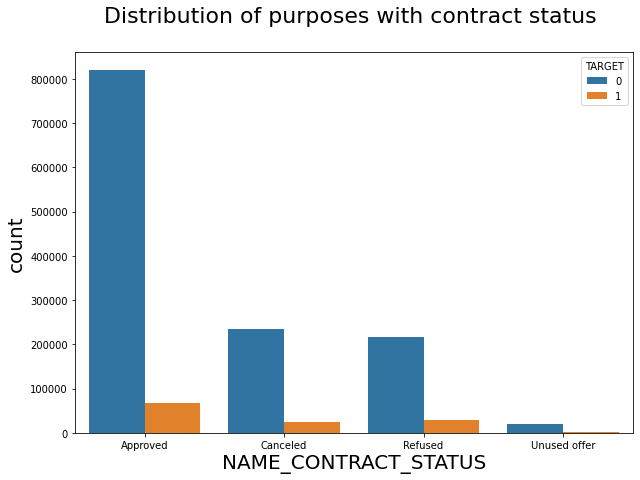

In [48]:
plt.figure(figsize=(10,7))
plt.title('Distribution of purposes with contract status ')
sns.countplot(data = df,x=df['NAME_CONTRACT_STATUS'], order=df['NAME_CONTRACT_STATUS'].value_counts().index,
              hue = 'TARGET') 
plt.show()